In [2]:
# Importing important libraries
import math 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:
# Difference of lasso and ridge regression :
# Some of the coefficients can be zero i.e. some of the features are completely neglected.

In [3]:
# Extracting the dataset
cancer = load_breast_cancer()
print(cancer.keys())
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
print(cancer_df.head(3))

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33            184.6   
1                 0.05667  ...         24.99          23.41            158.8   
2                 0.05999  ...         23.57          25.53  

In [4]:
# Creating seperate X and Y variables
X = cancer.data
Y = cancer.target

In [5]:
# Splitting the dataset
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=31)

In [6]:
# Initializing Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [7]:
# Training and testing Score
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print("Training score : ", train_score)
print("Test score : ", test_score)
print("Number of features used : ", coeff_used)

Training score :  0.5600974529893081
Test score :  0.5832244618818156
Number of features used :  4


In [9]:
# Lasso with alpha=0.01
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print("Training score for alpha = 0.01 : ", train_score001)
print("Test score for alpha = 0.01: ", test_score001)
print("n=Number of features used: for alpha = 0.01:", coeff_used001)

Training score for alpha = 0.01 :  0.7037865778498827
Test score for alpha = 0.01:  0.6641831577726228
n=Number of features used: for alpha = 0.01: 10


In [10]:
# Lasso with alpha=0.0001
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print("Training score for alpha = 0.0001 : ", train_score00001) 
print("Test score for alpha = 0.0001 : ", test_score00001)
print("Number of features used: for alpha = 0.0001 : ", coeff_used00001)

Training score for alpha = 0.0001 :  0.7754092006936698
Test score for alpha = 0.0001 :  0.7318608210757911
Number of features used: for alpha = 0.0001 :  22


In [12]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print("LR training score : ", lr_train_score)
print("LR test score : ", lr_test_score)

LR training score :  0.7842206194055069
LR test score :  0.7329325010888673


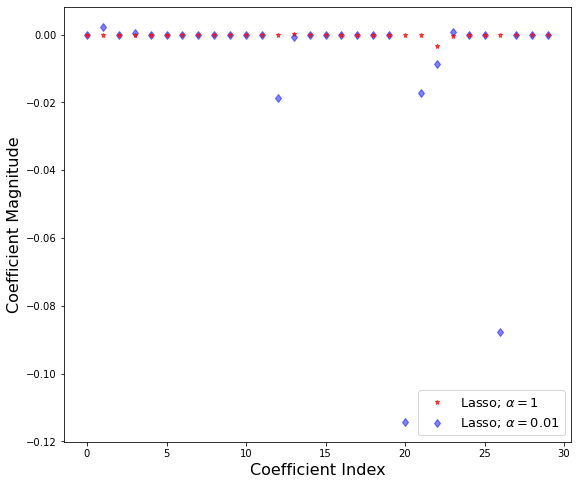

In [21]:
# Visualization
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

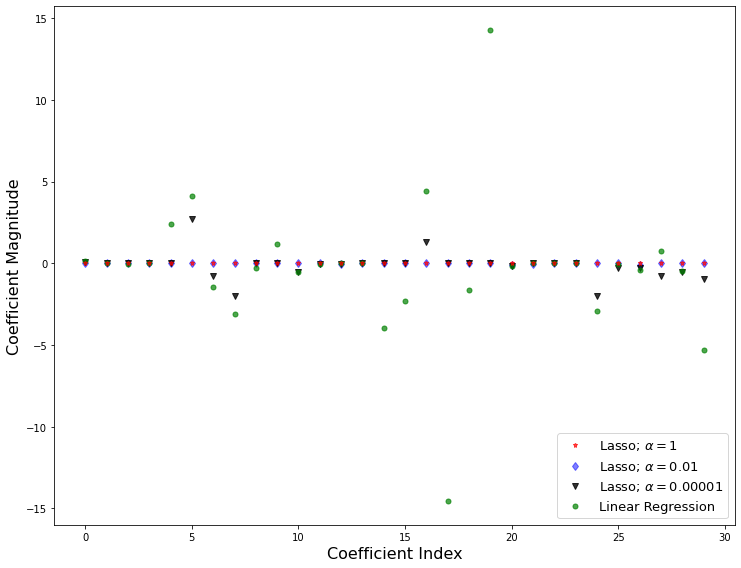

In [20]:
# Visualization
plt.figure(figsize=(20,8))
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

In [ ]:
# Let’s understand the plot and the code in a short summary.
# The default value of regularization parameter in Lasso regression (given by α) is 1.
# With this, out of 30 features in cancer data-set, only 4 features are used (non zero value of the coefficient).
# Both training and test score (with only 4 features) are low; conclude that the model is under-fitting the cancer data-set.
# Reduce this under-fitting by reducing alpha and increasing number of iterations. Now α = 0.01, non-zero features =10, training and test score increases.
# Comparison of coefficient magnitude for two different values of alpha are shown in the left panel of figure 2. For alpha =1, we can see most of the coefficients are zero or nearly zero, which is not the case for alpha=0.01.
# Further reduce α =0.0001, non-zero features = 22. Training and test scores are similar to basic linear regression case.
# In the right panel of figure, for α = 0.0001, coefficients for Lasso regression and linear regression show close resemblance.